# **Tutorial:** Custom YOLO Object Detection with RoboFlow

In this tutorial, you'll learn how to create a custom YOLO object detection model using your own classes and annotations with RoboFlow.

### **Step 1: Install Required Dependencies**

In [1]:
# %pip install --upgrade ultralytics
# %pip install opencv-python
%pip install roboflow
# %pip install matplotlib
# %pip install numpy==1.26.4 --force-reinstall

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.8 MB 11.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.8 MB 11.2 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/38.8 MB 11.2 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.8 MB 11.1 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/38.8 MB 10.9 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/38.8 MB 10.5 MB/s eta 0:00:03
   --------------- ------------------------ 15.5/38.8 MB 10.4 MB/s eta 0:00:03
   ----------------- ---------------------- 17.0/38.8 MB 10.0 MB/s eta 0:00:03
   ------------------- -------------------- 18.9/38.8 MB 9.9 MB/s eta 0:00:03
   --------------------- ------------------ 20.4/38.8 MB 9.7 MB/s eta 0:00:02
   ----------------------- ---------------- 22.5/38.8 MB 9.5 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/38.8 MB 9.4 MB/s et

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
insightface 0.7.3 requires onnx, which is not installed.
streamlit 1.38.0 requires pillow<11,>=7.1.0, but you have pillow 12.0.0 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Step 2: Import Required Libraries**

In [2]:
import cv2
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image, display

### **Step 3: Set Up RoboFlow Account**

1. Go to RoboFlow and create a free account
2. Create a new project and select "Object Detection" as project type
3. Choose "YOLOv8" as the model format

### **Step 4: Upload and Annotate Your Images**

#### Using RoboFlow Web Interface:

1. Click "Upload" to add your images
2. Use the annotation tool to draw bounding boxes around objects
3. Assign the correct class labels to each bounding box
4. Apply preprocessing and augmentation as needed

### **Step 5. Download your Custom your Dataset**

1. In RoboFlow, go to your project dashboard
2. Click "Generate" to create a dataset version
3. Apply any desired augmentations
4. Click "Export" and select "YOLOv**x**" format (**x** the version you are using)
5. Copy the download code

In [4]:
# # Initialize RoboFlow (you'll need your API key)

# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="uugD71oI3JrBihabx7vV")
# project = rf.workspace("eugenio-tblbg").project("yolo_custom-0zplf")
# version = project.version(3)
# dataset = version.download("yolov11")

In [6]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i2RyOkSNNfhQIaaZ7Bj8")
project = rf.workspace("pp-deteccin-de-objetos").project("prueba-ia-vgb4i")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Prueba-IA-1 in yolov11:: 100%|██████████| 60/60 [00:00<00:00, 522.26it/s]


### **Step 6: Train Your Custom YOLO Model**

In [7]:
# Load the YOLO model with custom configuration
model = YOLO('yolo11n.pt')  # Using nano version as base

# Train the model on your custom dataset
results = model.train(
    data=f'{dataset.location}/data.yaml',  # Path to dataset config
    epochs=20,  # Number of training epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name='custom_yolo_model'  # Name for the training run
)

New https://pypi.org/project/ultralytics/8.3.225 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.221  Python-3.10.10 torch-2.9.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=d:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab07\Prueba-IA-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosa

### **Step 7: Evaluate Your Model**

In [9]:
# # Evaluate model performance
# metrics = model.val()  # Validate the model
# print(f"mAP50-95: {metrics.box.map}")
# print(f"mAP50: {metrics.box.map50}")

# # Show some validation results
# !yolo task=detect mode=val model=runs/detect/custom_yolo_model/weights/best.pt data={dataset.location}/data.yaml

In [12]:
from pathlib import Path

# Construye rutas absolutas según tu estructura
root = Path.cwd().parent  # ...\Artificial-Intelligence
model_path = (root / "runs" / "detect" / "custom_yolo_model" / "weights" / "best.pt").resolve()
data_yaml  = (Path(dataset.location) / "data.yaml").resolve()

# Valida usando la API de Python (evita problemas de comillas/espacios)
model = YOLO(str(model_path))
metrics = model.val(data=str(data_yaml), imgsz=640, batch=1)

print(f"mAP50-95: {metrics.box.map:.3f}")
print(f"mAP50:    {metrics.box.map50:.3f}")


Ultralytics 8.3.221  Python-3.10.10 torch-2.9.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 270.532.9 MB/s, size: 160.0 KB)
val: Scanning D:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab07\Prueba-IA-1\valid\labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 5.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 11.8it/s 0.4s.3s
                   all          5         11    0.00733          1       0.79      0.475
Speed: 0.6ms preprocess, 63.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to D:\Archivos de Usuario\Documents\Artificial-Intelligence\runs\detect\val3
mAP50-95: 0.475
mAP50:    0.790


### **Step 8: Test Your Custom Model on an Image**

In [14]:
# # Load your custom trained model
# custom_model = YOLO('/Users/eugenio/Documents/Notebooks_ArtificialIntelligence/runs/detect/custom_yolo_model/weights/best.pt')

# # Test on a sample image
# results = custom_model('/Users/eugenio/Documents/Notebooks_ArtificialIntelligence/5. Computer Vision/Object Detection/taza_test.jpg', conf=0.03)

# # Display results
# %matplotlib inline
# for result in results:
#     img = result.plot()  # Plot detections
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.figure(figsize=(12, 8))
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.show()


image 1/1 D:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab07\new_img\1.jpeg: 320x640 2 pens, 75.6ms
Speed: 3.3ms preprocess, 75.6ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


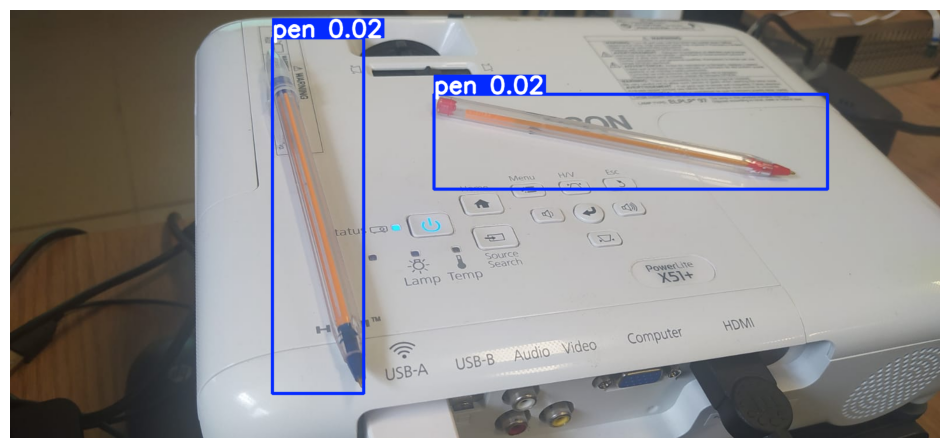

In [19]:
model_path = Path(r"D:\Archivos de Usuario\Documents\Artificial-Intelligence\runs\detect\custom_yolo_model\weights\best.pt")
img_path   = Path(r"D:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab07\new_img\1.jpeg")

custom_model = YOLO(str(model_path))
results = custom_model(source=str(img_path), conf=0.02)

%matplotlib inline
for result in results:
    img = result.plot()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


### **Step 9: Test Your Custom Model on Video**

In [20]:
import gc
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, update_display
from ultralytics import YOLO

# Cargar modelo entrenado
MODEL_PATH = Path(r"D:\Archivos de Usuario\Documents\Artificial-Intelligence\runs\detect\custom_yolo_model\weights\best.pt")
model = YOLO(str(MODEL_PATH))

In [21]:
model.names

{0: 'pen'}

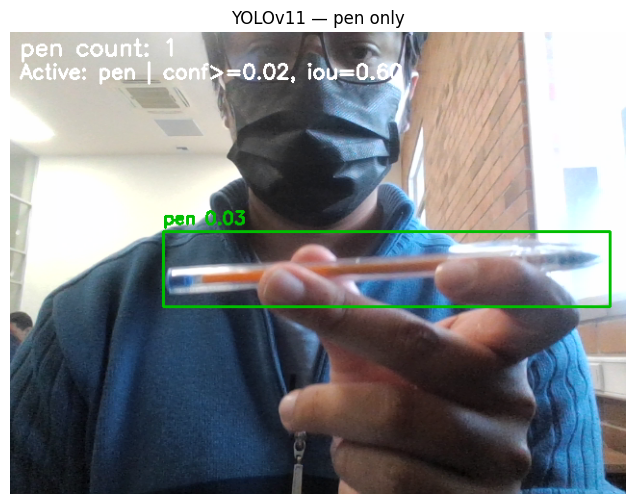

Detection stopped by user.
Webcam released and resources cleaned.


In [24]:
# Configuración directa de la clase
ACTIVE_IDS = [0] # ID único de la clase 'pen'
ACTIVE_NAMES = ["pen"]
CONF, IOU = 0.02, 0.60 # Umbrales de confianza y IoU

# Preparar vista inline en Jupyter
plt.ioff()
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("YOLOv11 — pen only")
ax.axis("off")
im = None
handle = display(fig, display_id=True)

# Abrir webcam
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,  640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
if not cap.isOpened():
    raise RuntimeError("Could not open webcam. Try index 1 or check permissions.")

try:
    while True:
        ok, frame = cap.read()
        if not ok:
            print("End of capture or read error.")
            break

        # Inferencia solo en la clase 'pen'
        results = model(frame, conf=CONF, iou=IOU,
                        classes=ACTIVE_IDS, device="cpu",
                        verbose=False)

        # Dibujo y conteo
        out = frame.copy()
        pens = 0
        if len(results):
            r = results[0]
            if r.boxes is not None:
                for box in r.boxes:
                    cls = int(box.cls[0])
                    if cls == 0:  # pen
                        pens += 1
                        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                        conf = float(box.conf[0])
                        cv2.rectangle(out, (x1, y1), (x2, y2), (0, 190, 0), 2)
                        cv2.putText(out, f"pen {conf:.2f}", (x1, max(y1 - 8, 10)),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 190, 0), 2)

        # Overlay informativo
        cv2.putText(out, f"pen count: {pens}", (10, 24),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        cv2.putText(out, f"Active: pen | conf>={CONF:.2f}, iou={IOU:.2f}", (10, 48),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Mostrar inline
        frame_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
        if im is None:
            im = ax.imshow(frame_rgb)
        else:
            im.set_data(frame_rgb)
        fig.canvas.draw()
        update_display(fig, display_id=handle.display_id)

except KeyboardInterrupt:
    print("Detection stopped by user.")
finally:
    cap.release()
    plt.close(fig)
    del cap, im, fig, ax, handle
    gc.collect()
    print("Webcam released and resources cleaned.")

## **Activity: Create Your Custom Detector**

1. **Create a RoboFlow account** and set up a new project
2. **Upload at least 20 images** of your custom objects
3. **Annotate all images** with bounding boxes and class labels
4. **Train a YOLO model** on your custom dataset
5. **Test your model** on new images and evaluate its performance
6. **Implement real-time detection** with your custom classes

## **Grading Rubric:**

| **Criteria** | **Points** | **Description** |
|-------------|-----------|----------------|
| **1. Dataset Creation** | 3 | Successfully creates and annotates a custom dataset with at least 50 images and multiple classes in RoboFlow. |
| **2. Model Training** | 3 | Properly trains a YOLOv8 model on the custom dataset with appropriate hyperparameters. |
| **3. Model Evaluation** | 2 | Evaluates model performance with appropriate metrics and provides analysis of results. |
| **4. Custom Detection** | 2 | Implements real-time detection with custom classes and displays results correctly. |
| **5. Documentation** | 1 | Provides clear documentation of the process, including dataset details and model performance. |

**Total: 10 points**

## **Tips for Success:**

- **Quality over quantity**: Well-annotated images are more important than many poorly annotated ones
- **Class balance**: Try to have a similar number of examples for each class
- **Variety**: Include different angles, lighting conditions, and backgrounds
- **Augmentation**: Use RoboFlow's augmentation features to expand your dataset

<p style="text-align: right; font-size:14px; color:gray;">
<b>Prepared by:</b><br>
Manuel Eugenio Morocho-Cayamcela
</p>